In [121]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

In [97]:
import pickle

with open('my_dataset.pickle', 'rb') as data:
    df = pickle.load(data)

In [98]:
with open('my_stat_feat.pickle', 'rb') as data_stat:
    features = pickle.load(data_stat)

### <ins>Point 1.</ins>

### <ins>Should we take only stat feats or all of them?.</ins>

In [99]:
X, X_test, y, y_test = train_test_split(
    df[features].values, # X  come numpy array
    df['label'].values, # y come numpy array
    stratify = df['label'], # stratify the dataset based on class labels
    train_size = 0.7, # percentage of training set
    random_state = 15 #for random chose of samples
)

In [100]:
X_train, X_validation, y_train, y_validation = train_test_split(
    df[features].values, # X  come numpy array
    df['label'].values, # y come numpy array
    stratify = df['label'], # stratify the dataset based on class labels
    train_size = 0.7143, # percentage of training set
    random_state = 15 #for random chose of samples
)

In [101]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

### <ins>Point 2.</ins>

In [102]:
import random

X_train_df=pd.DataFrame(X_train)
X_validation_df=pd.DataFrame(X_validation)
X_test_df=pd.DataFrame(X_test)
y_train_df=pd.DataFrame(y_train)
y_test_df=pd.DataFrame(y_test)
y_validation_df=pd.DataFrame(y_validation)

y_lossy = y_train_df.groupby(0).get_group(1).index
y_lossless = y_train_df.groupby(0).get_group(0).index

num_of_el_to_pick = len(y_lossy)

index_lossy = random.sample(sorted(set(y_lossy)),num_of_el_to_pick)
index_lossless = random.sample(sorted(set(y_lossless)),num_of_el_to_pick)

df_lossless = X_train_df.loc[index_lossless]
df_lossy = X_train_df.loc[index_lossy]

X_balanced = pd.concat([df_lossless, df_lossy])
Y_balanced = pd.concat([y_train_df.loc[index_lossless], y_train_df.loc[index_lossy]])


In [103]:
X_balanced = X_balanced.sort_index()
Y_balanced = Y_balanced.sort_index()

In [104]:
X_balanced_np = X_balanced.to_numpy()
Y_balanced_np = Y_balanced.to_numpy()

### <ins>Point 3.</ins>

In [51]:
m1 = KNeighborsClassifier()
m1.fit(X_balanced_np, Y_balanced_np)
y_train_pred1 = m1.predict(X_balanced_np)
y_validation_pred1 = m1.predict(X_validation)

c:\Users\utente\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [52]:
print(classification_report(Y_balanced_np, y_train_pred1))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     23200
           1       0.95      0.94      0.94     23200

    accuracy                           0.94     46400
   macro avg       0.94      0.94      0.94     46400
weighted avg       0.94      0.94      0.94     46400



In [53]:
print(classification_report(y_validation, y_validation_pred1))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    601527
           1       0.18      0.91      0.30      9279

    accuracy                           0.93    610806
   macro avg       0.59      0.92      0.63    610806
weighted avg       0.99      0.93      0.96    610806



In [56]:
m2 = DecisionTreeRegressor()
m2.fit(X_balanced_np, Y_balanced_np)
y_train_pred2 = m2.predict(X_balanced_np)
y_validation_pred2 = m2.predict(X_validation)

In [58]:
print(classification_report(Y_balanced_np, y_train_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23200
           1       1.00      1.00      1.00     23200

    accuracy                           1.00     46400
   macro avg       1.00      1.00      1.00     46400
weighted avg       1.00      1.00      1.00     46400



In [57]:
print(classification_report(y_validation, y_validation_pred2))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96    601527
           1       0.17      0.93      0.28      9279

    accuracy                           0.93    610806
   macro avg       0.58      0.93      0.62    610806
weighted avg       0.99      0.93      0.95    610806



In [71]:
m3 = RandomForestClassifier()
m3.fit(X_balanced_np, Y_balanced_np)
y_train_pred3 = m3.predict(X_balanced_np)
y_validation_pred3 = m3.predict(X_validation)

c:\Users\utente\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [72]:
print(classification_report(Y_balanced_np, y_train_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23200
           1       1.00      1.00      1.00     23200

    accuracy                           1.00     46400
   macro avg       1.00      1.00      1.00     46400
weighted avg       1.00      1.00      1.00     46400



In [73]:
print(classification_report(y_validation, y_validation_pred3))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    601527
           1       0.23      0.95      0.37      9279

    accuracy                           0.95    610806
   macro avg       0.61      0.95      0.67    610806
weighted avg       0.99      0.95      0.97    610806



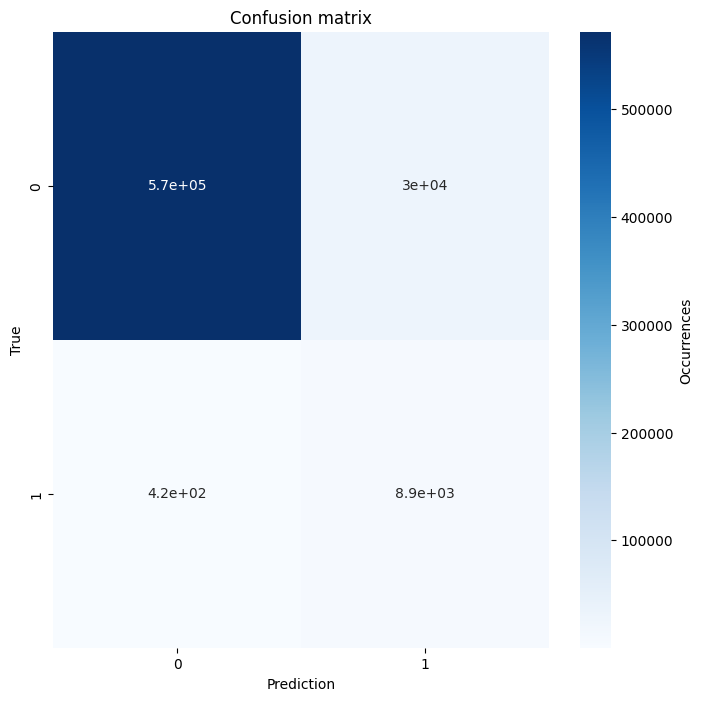

In [74]:
confusion_test = confusion_matrix(y_validation, y_validation_pred3)

# visualize the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(confusion_test, cmap='Blues', annot=True, cbar_kws={'label':'Occurrences'})
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Confusion matrix')
plt.show()

In [ ]:
gnb = GaussianNB()
gnb.fit(X_balanced, Y_balanced)
y_test_pred = gnb.predict(X_test)

print(classification_report(y_test, y_test_pred))

### <ins>We choose RandomForest because has better performances on 1 detection accuracy.</ins>

### <ins>Point 4.</ins>

In [115]:

y_lossy = y_train_df.groupby(0).get_group(1).index
y_lossless = y_train_df.groupby(0).get_group(0).index

num_of_lossless_to_pick1 = len(y_lossy) + int(np.ceil(5*len(y_lossless)/100))
num_of_lossless_to_pick2 = len(y_lossy) + int(np.ceil(7*len(y_lossless)/100))
num_of_lossless_to_pick3 = len(y_lossy) + int(np.ceil(9*len(y_lossless)/100))

index_lossless1 = random.sample(sorted(set(y_lossless)),num_of_lossless_to_pick1)
index_lossless2 = random.sample(sorted(set(y_lossless)),num_of_lossless_to_pick2)
index_lossless3 = random.sample(sorted(set(y_lossless)),num_of_lossless_to_pick3)

df_lossless1 = X_train_df.loc[index_lossless1]
df_lossless2 = X_train_df.loc[index_lossless2]
df_lossless3 = X_train_df.loc[index_lossless3]


X_balanced1 = pd.concat([df_lossless1, df_lossy])
Y_balanced1 = pd.concat([y_train_df.loc[index_lossless1], y_train_df.loc[index_lossy]])

X_balanced2 = pd.concat([df_lossless2, df_lossy])
Y_balanced2 = pd.concat([y_train_df.loc[index_lossless2], y_train_df.loc[index_lossy]])

X_balanced3 = pd.concat([df_lossless3, df_lossy])
Y_balanced3 = pd.concat([y_train_df.loc[index_lossless3], y_train_df.loc[index_lossy]])


In [108]:
np.ceil(15*len(y_lossless)/100)

225589.0

In [116]:
X_balanced1_np = X_balanced1.to_numpy()
Y_balanced1_np = Y_balanced1.to_numpy()

X_balanced2_np = X_balanced2.to_numpy()
Y_balanced2_np = Y_balanced2.to_numpy()

X_balanced3_np = X_balanced3.to_numpy()
Y_balanced3_np = Y_balanced3.to_numpy()

In [111]:
T1 = RandomForestClassifier()
T1.fit(X_balanced1_np, Y_balanced1_np)
y_train_pred_T1 = T1.predict(X_balanced1_np)
y_validation_pred_T1 = T1.predict(X_validation)

c:\Users\utente\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [112]:
print(classification_report(Y_balanced1_np, y_train_pred_T1))
print(classification_report(y_validation, y_validation_pred_T1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     98397
           1       1.00      1.00      1.00     23200

    accuracy                           1.00    121597
   macro avg       1.00      1.00      1.00    121597
weighted avg       1.00      1.00      1.00    121597

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    601527
           1       0.55      0.89      0.68      9279

    accuracy                           0.99    610806
   macro avg       0.77      0.94      0.84    610806
weighted avg       0.99      0.99      0.99    610806



In [117]:
T2 = RandomForestClassifier()
T2.fit(X_balanced2_np, Y_balanced2_np)
y_train_pred_T2 = T2.predict(X_balanced2_np)
y_validation_pred_T2 = T2.predict(X_validation)

c:\Users\utente\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [118]:
print(classification_report(Y_balanced2_np, y_train_pred_T2))
print(classification_report(y_validation, y_validation_pred_T2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    128475
           1       1.00      1.00      1.00     23200

    accuracy                           1.00    151675
   macro avg       1.00      1.00      1.00    151675
weighted avg       1.00      1.00      1.00    151675

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    601527
           1       0.60      0.88      0.72      9279

    accuracy                           0.99    610806
   macro avg       0.80      0.94      0.86    610806
weighted avg       0.99      0.99      0.99    610806



In [119]:
T3 = RandomForestClassifier()
T3.fit(X_balanced3_np, Y_balanced3_np)
y_train_pred_T3 = T3.predict(X_balanced3_np)
y_validation_pred_T3 = T3.predict(X_validation)

c:\Users\utente\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [120]:
print(classification_report(Y_balanced3_np, y_train_pred_T3))
print(classification_report(y_validation, y_validation_pred_T3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    158553
           1       1.00      1.00      1.00     23200

    accuracy                           1.00    181753
   macro avg       1.00      1.00      1.00    181753
weighted avg       1.00      1.00      1.00    181753

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    601527
           1       0.64      0.87      0.74      9279

    accuracy                           0.99    610806
   macro avg       0.82      0.93      0.87    610806
weighted avg       0.99      0.99      0.99    610806



### <ins>msg from Nicolò: It takes to much time for me to run above 10%, maybe Marco can do better with his computer</ins>

### <ins>Point 5.</ins>

### <ins>Still to find best combinations.</ins>

In [ ]:
# e.g., RF - parameters to be optimizaed:
    # n_estimators: number of trees
    # max_depth: the maximum depth of trees

# iterate over all possible combinations
for n_estimators in range(10, 50, 100):
    for max_depth in [2, 3, 4, 5, None]:
        # initialize and fit a model per pair of parameters
        rf_tmp = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=12)
        rf_tmp.fit(X_balanced3_np, Y_balanced3_np)
        # here we only refer to accuracy for simplicity
        acc_train = accuracy_score(Y_balanced3_np, rf_tmp.predict(X_balanced3_np))
        acc_val = accuracy_score(y_validation, rf_tmp.predict(X_validation))
        print(f'number_trees: {n_estimators}, max depth: {max_depth}, accuracy: train - {acc_train} | val - {acc_val}')